### Intoduction

This is Vehicle dataset from cardekho Dataset . This dataset contains information about used cars listed on website cardekho.com. We are going to use for finding predictions of price with the use of regression models.

The datasets consist of several independent variables include:

Car_Name : This column should be filled with the name of the car.

Year : This column should be filled with the year in which the car was bought.

Selling_Price : This column should be filled with the price the owner wants to sell the car at.

Present_Price : This is the current ex-showroom price of the car.

Kms_Driven : This is the distance completed by the car in km.

Fuel_Type : Fuel type of the car i.e Diesel,Petrol,CNG

Seller_Type : Defines whether the seller is a dealer or an individual.

Transmission : Defines whether the car is manual or automatic.

Owner : Defines the number of owners the car has previously had.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the dataset

In [2]:
df=pd.read_csv('car data.csv')

### Data Exploration

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Null Values

In [8]:
df.isnull().any().any()

False

In [9]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There are all non null values present in the columns

In this regression model the dependent variable will be 'Selling_price' rest all the variables will be considered as independent variables

In [11]:
#other details of dataset
def value_count(df):
    for var in df.columns:
        print(df[var].value_counts())
        print('-'*50)

In [12]:
value_count(df)

city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Hyosung GT250R         1
Activa 4g              1
KTM RC390              1
land cruiser           1
Bajaj Discover 100     1
Name: Car_Name, Length: 98, dtype: int64
--------------------------------------------------
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64
--------------------------------------------------
0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
        ..
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64
--------------------------------------------------
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
9.29      1
92.60     1
13.70     1
1.17      1
0.65      1
Name: Present_Price, Length: 1

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [17]:
df1=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [18]:
df1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [30]:
df1['Current_year']=2020
df1.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020


In [31]:
df1['no_of_years']=df1['Current_year'] - df1['Year']
df1.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,no_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7


In [32]:
df1.drop(['Year','Current_year'],axis=1,inplace=True)

In [33]:
df1.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7


### EDA

UNIVARIATE ANALYSIS

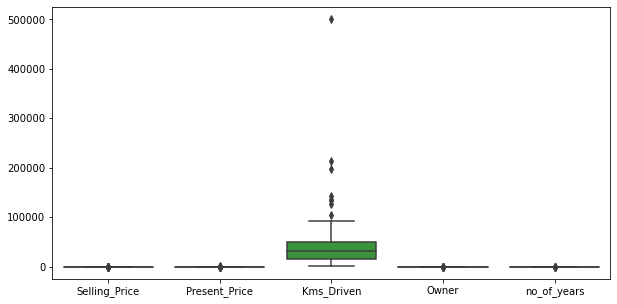

In [34]:
plt.figure(figsize = (10,5))
sns.boxplot(data=df1)
plt.show()

 from the boxplot we can see that kms_Driven has outliers

In [24]:
q1 = df1['Kms_Driven'].quantile(0.25)
q3 = df1['Kms_Driven'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print('iqr:',iqr)
print('UL:',UL)
print( 'LL:',LL)

iqr: 33767.0
UL: 99417.5
LL: -35650.5


In [35]:
df1[df1['Kms_Driven']<LL]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years


In [36]:
df1[df1['Kms_Driven']>UL]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
37,0.35,2.28,127000,Petrol,Individual,Manual,0,17
50,14.90,30.61,104707,Diesel,Dealer,Automatic,0,8
53,16.00,30.61,135000,Diesel,Individual,Automatic,0,7
77,1.50,12.35,135154,Petrol,Dealer,Automatic,0,16
84,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
85,2.50,23.73,142000,Petrol,Individual,Automatic,3,14
179,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,0.17,0.52,500000,Petrol,Individual,Automatic,0,12



These 8 values are greater than the upper limit value 99417.5

We would remove these values

In [37]:
df2=df1[(df1['Kms_Driven']<UL) & (df1['Kms_Driven']>LL)]

In [38]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [39]:
df2.shape

(293, 8)

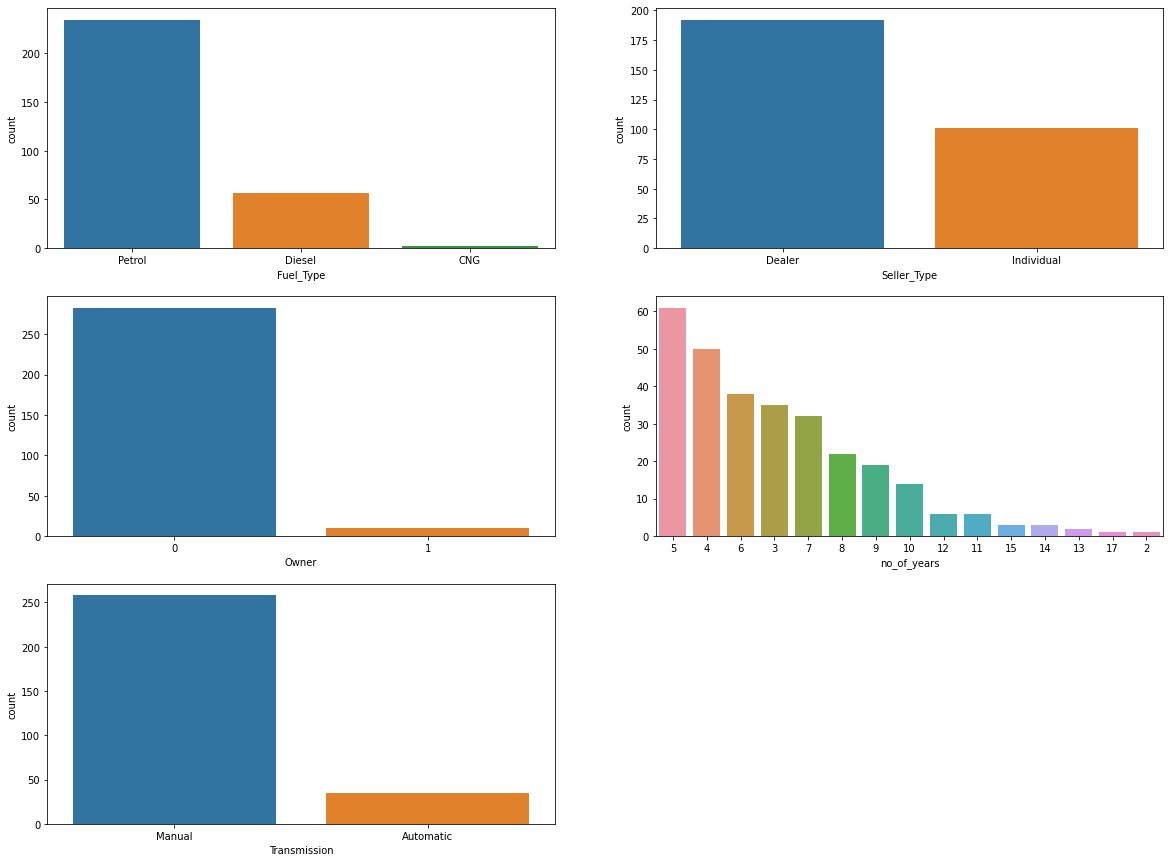

In [50]:
l=['Fuel_Type','Seller_Type',"Owner",'no_of_years','Transmission']

j=1

fig=plt.figure(figsize=(20,15))

for i in l:
    
      plt.subplot(3, 2, j)
    
      sns.countplot(df2[i], order = df2[i].value_counts().index)
    
      j=j+1

plt.show()

Petrol Fuel_type is the maximum in number and CNG cars are the least

The seller_type dealer is greater than the individual seller_type

The cars having 0 previous owners is more than the cars having one previous owner.

 Manual_Transmission is greater than Automatic_Transmission

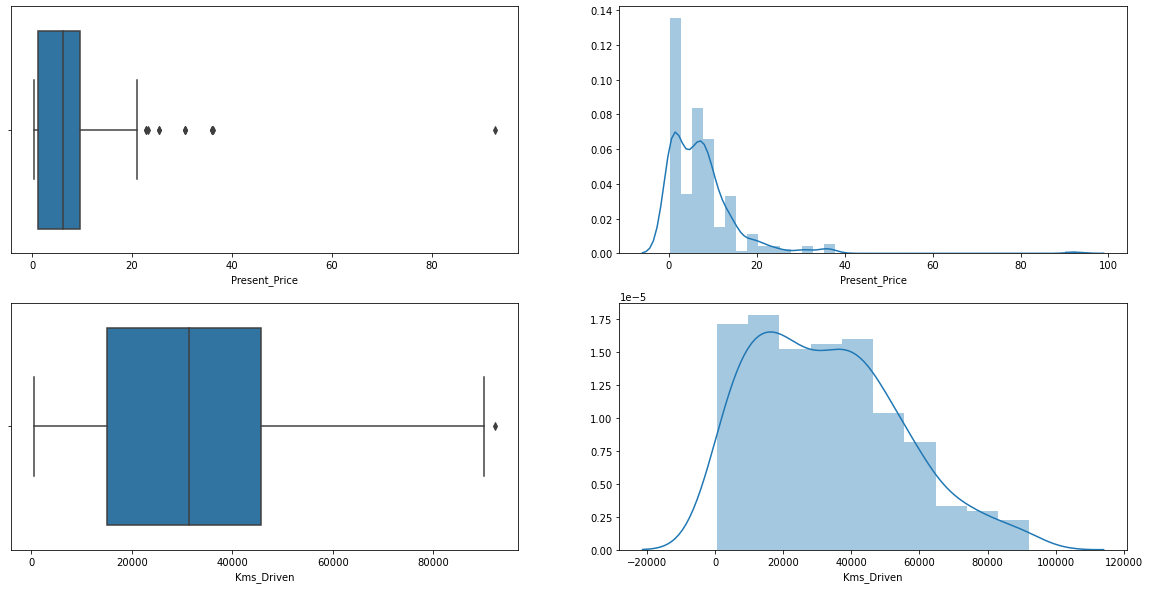

In [51]:
l = ['Present_Price', 'Kms_Driven']
j = 1

fig = plt.figure(figsize=(20,10))


for i in l:
    
    plt.subplot(2, 2, j)
    
    sns.boxplot(df2[i])
    
    j = j+1
    
    plt.subplot(2, 2, j)
    
    sns.distplot(df2[i])
    
    j = j+1
    
plt.show()

from the boxplot we can see that Present_price has outliers

In [53]:
q1 = df2['Present_Price'].quantile(0.25)
q3 = df2['Present_Price'].quantile(0.75)
iqr = q3-q1

UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
print('iqr:',iqr)
print('UL:',UL)
print( 'LL:',LL)

iqr: 8.34
UL: 22.049999999999997
LL: -11.31


In [55]:
df2[df2['Present_Price']<LL]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years


In [54]:
df2[df2['Present_Price']>UL]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,5
59,19.99,35.96,41000,Diesel,Dealer,Automatic,0,6
62,18.75,35.96,78000,Diesel,Dealer,Automatic,0,6
63,23.50,35.96,47000,Diesel,Dealer,Automatic,0,5
64,33.00,36.23,6000,Diesel,Dealer,Automatic,0,3
66,19.75,23.15,11000,Petrol,Dealer,Automatic,0,3
78,5.25,22.83,80000,Petrol,Dealer,Automatic,0,10
79,14.50,30.61,89000,Diesel,Dealer,Automatic,0,8
82,23.00,25.39,15000,Diesel,Dealer,Automatic,0,3
86,35.00,92.60,78000,Diesel,Dealer,Manual,0,10


We would remove these values

In [57]:
df3=df2[(df2['Present_Price']<UL) & (df2['Present_Price']>LL)]
df3.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7


In [58]:
df3.shape

(280, 8)

### Bivarate analysis

In [ ]:
 l = ['Present_Price', 'Kms_Driven','no_of_years']
j = 1

fig = plt.figure(figsize=(15,10))


for i in l:
    
    plt.subplot(2, 2, j)
    
    sns.scatterplot(x=df3[i],y=df3['Selling_Price'])
    
    j = j+1
    
plt.show()

The selling price of those cars is greater whose present_price is greater i.e the present_price and sellin_price is directly proportional.

As the Km_Driven increases the Selling_price of the car decreases

The older the car the lesser the selling price

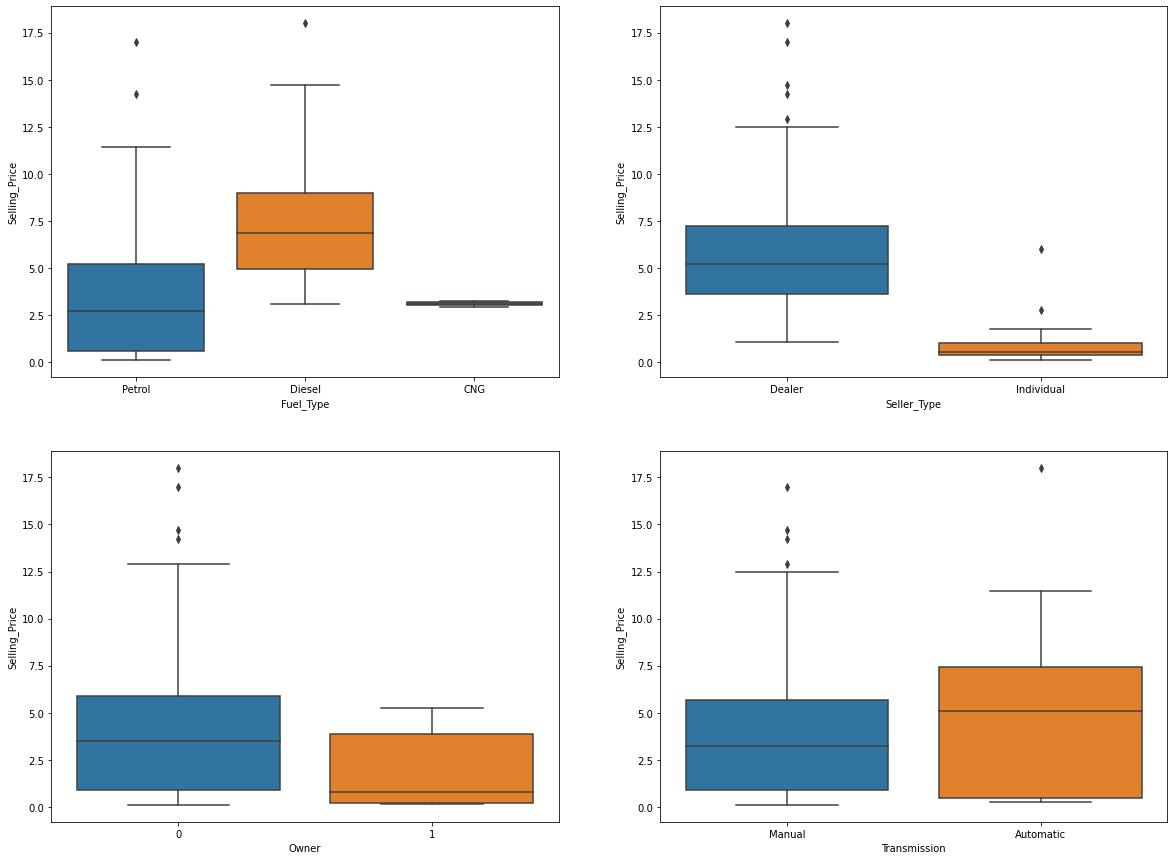

In [66]:
l=['Fuel_Type','Seller_Type',"Owner",'Transmission']

j=1

fig=plt.figure(figsize=(20,15))

for i in l:
    
      plt.subplot(2, 2, j)
    
      sns.boxplot(x=df3[i], y=df3['Selling_Price'],order = df3[i].value_counts().index)
    
      j=j+1

plt.show()

The Diesel cars are having the highest selling_price . Diesel > CNG > Petrol in terms of seeling price

Automatic cars are expesnive than manual cars

The cars with no previous owner are expensive than with a previous owner.

Individuals are selling there cars at lesser price than the cars being sold by the dealers

### Converting categorical variables to dummy variables

In [68]:
df3['Fuel_Type'].value_counts()

Petrol    231
Diesel     47
CNG         2
Name: Fuel_Type, dtype: int64

In [69]:
df3['Seller_Type'].value_counts()

Dealer        179
Individual    101
Name: Seller_Type, dtype: int64

In [70]:
df3['Transmission'].value_counts()

Manual       257
Automatic     23
Name: Transmission, dtype: int64

In [71]:
df3['Owner'].value_counts()

0    270
1     10
Name: Owner, dtype: int64

In [72]:
df4 = pd.get_dummies(df3,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)

In [73]:
df4.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1


In [74]:
df4.shape

(280, 9)

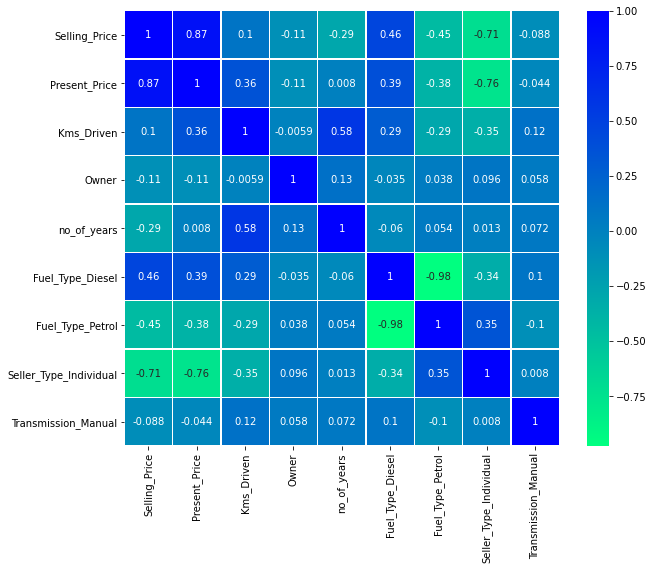

In [75]:
#Heatmap to show the correlation between various variables of the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df4.corr(), square=True, annot= True, cmap="winter_r", linewidths=0.3,linecolor='white',)

The target variable Selling Price is highly correlated with:

Present Price

Fuel Type

### Input and Ouput data

In [76]:
X=df4.drop('Selling_Price',axis=1)

In [77]:
y=df4['Selling_Price']

In [78]:
print("Input Shape : ", X.shape)
print("Output Shape : ", y.shape)

Input Shape :  (280, 8)
Output Shape :  (280,)


In [83]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [84]:
print(model.feature_importances_)

[0.43757521 0.04043143 0.00049601 0.1224591  0.02380048 0.00774849
 0.36053216 0.00695712]


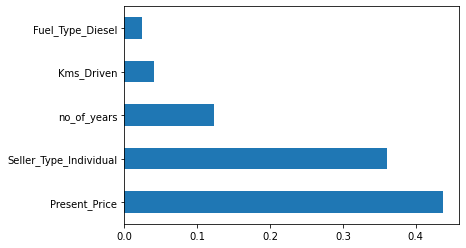

In [85]:
feat_imp=pd.Series(model.feature_importances_,index=X.columns)
feat_imp.nlargest(5).plot(kind='barh')
plt.show()

### Splitting training and testing data:

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [80]:
print("X_train.shape : ", X_train.shape)
print("X_test.shape  : ", X_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape  : ", y_test.shape)

X_train.shape :  (196, 8)
X_test.shape  :  (84, 8)
y_train.shape :  (196,)
y_test.shape  :  (84,)


### Pre-processing

In [81]:
#standardization of the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### Linear Regression Model

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [87]:
y_pred=lr.predict(X_test)

In [88]:
lr.intercept_

3.9370408163265305

In [89]:
lr.coef_

array([ 2.5475562 , -0.43626573, -0.00320709, -0.81319561,  0.63025898,
        0.20418662, -0.45403122, -0.10646813])

In [96]:
pd.DataFrame(lr.coef_,index=X.columns,columns=['coefficient'])

,coefficient
Present_Price,2.547556
Kms_Driven,-0.436266
Owner,-0.003207
no_of_years,-0.813196
Fuel_Type_Diesel,0.630259
Fuel_Type_Petrol,0.204187
Seller_Type_Individual,-0.454031
Transmission_Manual,-0.106468


In [99]:
# compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.reset_index(inplace=True,drop=True)
df

,Actual,Predicted
0,2.85,3.581010
1,1.05,0.082114
2,0.30,-1.245426
3,2.00,2.615846
4,4.75,4.762585
...,...,...
79,1.10,1.408668
80,4.50,4.418895
81,0.25,-1.685116
82,12.90,9.760273


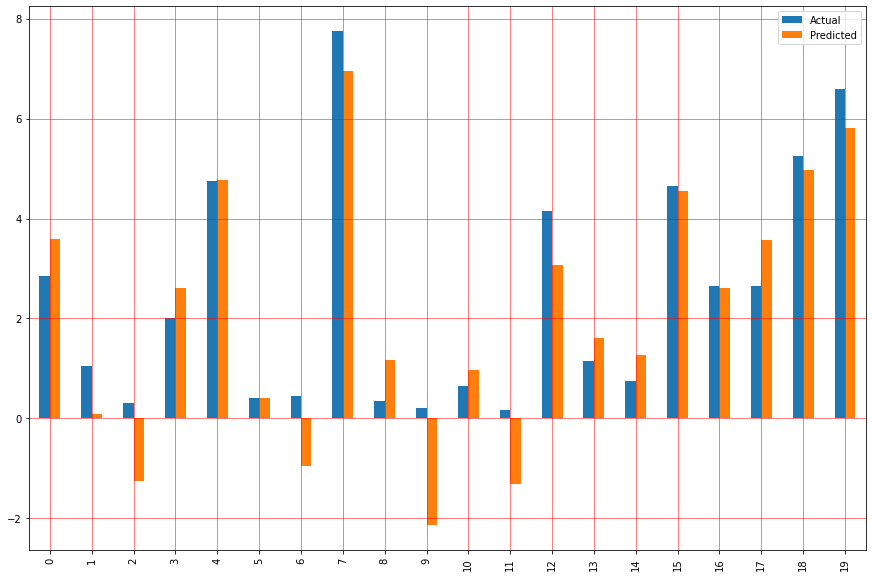

In [105]:
df.head(20).plot(kind='bar',figsize=(15,10))
plt. grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

In [108]:
#Calculating the accuracy 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('r2_score:', metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 1.0901097180621209
Mean Squared Error: 2.5099648679467013
Root Mean Squared Error: 1.5842868641589822
r2_score: 0.8219990549670024


In [109]:
# Building a linear Regression model using statsmodels (OLS)
import statsmodels.api as sm
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()
predictions = model.predict(X_constant)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     238.7
Date:                Sat, 13 Feb 2021   Prob (F-statistic):          5.65e-118
Time:                        06:07:59   Log-Likelihood:                -445.92
No. Observations:                 280   AIC:                             909.8
Df Residuals:                     271   BIC:                             942.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3

### Random Forest Model

In [110]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [111]:
n_estimators=[int(x) for x in np.linspace(start=100, stop= 1200,num=12)]

In [112]:
max_features=['auto','sqrt']

In [113]:
max_depth=[int(x) for x in np.linspace(5,30,num=12)]

In [114]:
min_samples_split=[2,5,10,15,100]

In [115]:
min_samples_leaf=[1,2,5,10]

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 7, 9, 11, 14, 16, 18, 20, 23, 25, 27, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [119]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,random_state=42,n_jobs=1)

In [120]:
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 14, 16, 18,
                                                      20, 23, 25, 27, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [121]:
prediction=rf_random.predict(X_test)

In [122]:
prediction

array([ 2.84127943,  1.23944192,  0.32061773,  2.97244072,  4.59374033,
        0.37020525,  0.54867334,  7.46494104,  0.36674073,  0.47208514,
        0.44953792,  0.31995166,  3.92570586,  1.23961485,  0.5927565 ,
        4.48082343,  3.42521546,  3.12954017,  5.41211296,  5.87612157,
        5.44092984,  1.23961485,  4.50706419,  5.39283089,  1.26632691,
        5.40494119,  1.23903485,  0.56059098,  0.54235023,  6.76161108,
        3.96165824,  0.5686282 ,  0.37421219,  7.39651023, 10.51610146,
        8.16816769, 10.28181689,  7.06003185,  0.66695417,  5.31861723,
        7.56107782,  7.23063515,  0.32053533,  6.61766789,  3.57548302,
        7.37071315,  0.39974435,  0.32053533,  5.99046277,  7.06124549,
        5.44868905,  1.23886192,  5.33161082,  6.76112177,  0.34409571,
        5.4089741 ,  0.54867334,  1.23944192,  0.68986538,  5.22119857,
        5.81924562,  5.3735416 ,  4.78840527,  0.37561794,  2.01947915,
        9.75508837,  0.56262342,  1.23886192,  9.75929142,  1.24

In [123]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})
df.reset_index(inplace=True,drop=True)
df

,Actual,Predicted
0,2.85,2.841279
1,1.05,1.239442
2,0.30,0.320618
3,2.00,2.972441
4,4.75,4.593740
...,...,...
79,1.10,1.263918
80,4.50,4.865509
81,0.25,0.376394
82,12.90,9.909321


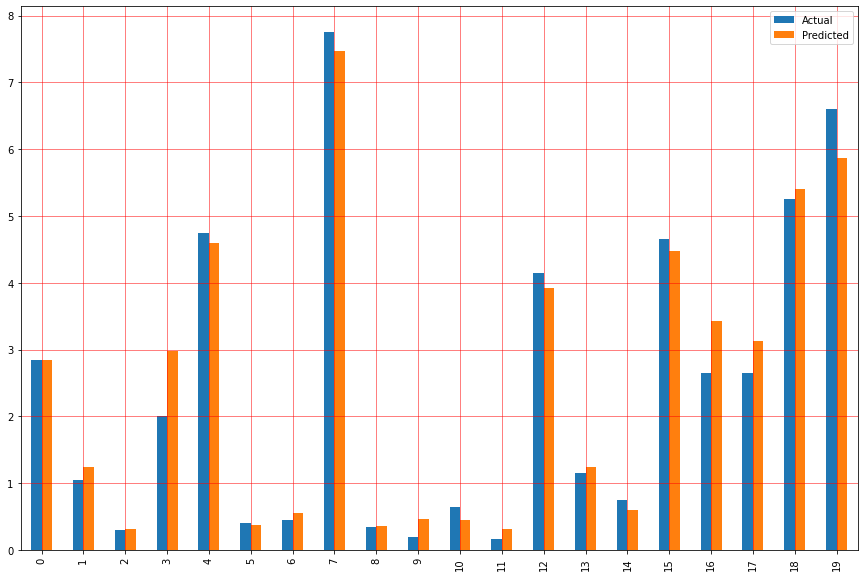

In [124]:
df.head(20).plot(kind='bar',figsize=(15,10))
plt. grid(color='r', linestyle='-', linewidth=0.5)
plt.show()

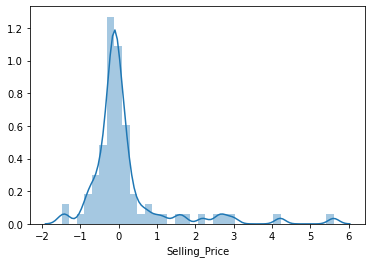

In [125]:
sns.distplot(y_test-prediction)

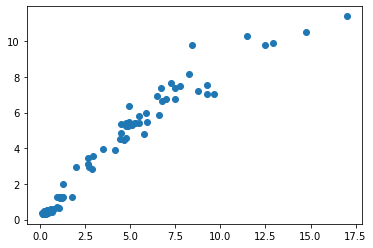

In [126]:
plt.scatter(y_test,prediction)

In [127]:
#Calculating the accuracy 

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

print('r2_score:', metrics.r2_score(y_test,prediction))

Mean Absolute Error: 0.5653461107066065
Mean Squared Error: 1.1608094533754396
Root Mean Squared Error: 1.0774086751903567
r2_score: 0.9176780590267396
